In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import os
import datetime as dt
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import cmocean
import json
import f90nml
from collections import OrderedDict
from scipy.stats.mstats import gmean

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display



%matplotlib inline



In [2]:
PSdf=pd.read_excel('/ocean/ksuchy/MOAD/observe/PugetSoundBiomassDF.xlsx',engine='openpyxl')

In [3]:
PSdf

,Unnamed: 0,Key,Station,Site Name,Basin,Sub Basin,Lat,Lon,Sample Date,Sample Year,...,YD,Total,Copepods,Amphipods,Euphausiids,MainGroups,Gastropods,Chaetognaths,Crabs,Larvaceans
0,0,010218ELIV1151,ELIV,Eliza Island,Bellingham Bay,Bellingham Bay,48.63795,-122.5694,2018-01-02,2018,...,2,12.189953,3.065202,5.438239,0.067185,12.189953,0.000000,0.507425,1.223176,1.888727
1,1,010818SKETV1058,SKETV,South Ketron/Solo Point,South Sound,South Sound,47.15243,-122.6586,2018-01-08,2018,...,8,35.059787,1.482905,7.505748,0.000000,35.045540,0.014246,0.000000,4.870446,21.186442
2,2,011119ELIV1052,ELIV,Eliza Island,Bellingham Bay,Bellingham Bay,48.63795,-122.5694,2019-01-11,2019,...,11,8.506914,3.067335,4.452295,0.000000,7.856868,0.650047,0.337238,0.000000,0.000000
3,3,011315CAMV1330,CAMV,Camano Head,Whidbey Basin,S Whidbey Basin,48.05901,-122.3873,2015-01-13,2015,...,13,15.115082,7.412901,6.376149,0.000000,15.065975,0.049107,0.004042,1.272882,0.000000
4,4,011315MUKV1415,MUKV,Mukilteo,Whidbey Basin,S Whidbey Basin,47.97166,-122.3222,2015-01-13,2015,...,13,26.622828,5.429623,15.713070,0.000000,26.572865,0.049964,0.636865,2.440229,2.353078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,1154,121917LSNT01V1000,LSNT01V,Point Williams,Central Basin,N Central Basin,47.53333,-122.4333,2017-12-19,2017,...,353,27.971567,2.634376,14.569518,0.011859,27.872636,0.098930,0.007236,0.000000,10.649647
1155,1155,121917NSEX01V1224,NSEX01V,East Passage,Central Basin,S Central Basin,47.35862,-122.3871,2017-12-19,2017,...,353,60.712435,4.150465,24.121695,0.000000,60.586615,0.125820,0.052978,0.000000,32.261477
1156,1156,121918TDBV1327,TDBV,Thorndyke Bay,Hood Canal,N Hood Canal,47.78297,-122.7330,2018-12-19,2018,...,353,23.481055,3.805862,8.147882,0.000000,18.327114,5.153941,0.067951,0.394089,5.911330
1157,1157,122116LSNT01V1057,LSNT01V,Point Williams,Central Basin,N Central Basin,47.53333,-122.4333,2016-12-21,2016,...,356,27.306153,5.710469,9.113340,0.000000,27.250018,0.056134,0.061874,0.000000,12.364336


In [4]:
SoGdf=pd.read_excel('/ocean/ksuchy/MOAD/observe/SoGBiomassDF.xlsx',engine='openpyxl')

In [5]:
SoGdf

,Unnamed: 0,Key,region_name,Station,Lon,Lat,Date,dtUTC,Twilight,Net_Type,...,MainGroups,OtherGroups,Amphipods,Decapods,Euphausiids,Calanoids,Cyclopoids,Poecilostomatoids,Larvaceans,Harpacticoids
0,0,IOS2012005000901,Northern Strait of Georgia,22,-124.272,49.670,6/14/2012,2012-06-14 14:32:00,Daylight,SCOR VNH,...,7.677976,4.102141,0.651919,0.058711,0.293895,6.398464,0.159957,0.268191,0.412610,0.0
1,1,IOS2012005001001,Northern Strait of Georgia,22,-124.272,49.670,6/14/2012,2012-06-14 14:52:00,Daylight,SCOR VNH,...,9.403794,2.664864,1.157931,0.106160,0.075942,7.989493,0.170568,0.106861,0.521131,0.0
2,2,IOS2012005002101,Northern Strait of Georgia,11,-124.722,49.710,6/14/2012,2012-06-14 07:00:00,Night,SCOR VNH,...,34.103637,2.798613,3.804673,2.595510,0.034740,26.090640,0.532044,0.143109,0.008627,0.0
3,3,IOS2012005002201,Northern Strait of Georgia,11,-124.722,49.710,6/14/2012,2012-06-14 07:05:00,Night,SCOR VNH,...,45.580649,6.001330,10.609929,1.660954,1.922044,30.696165,0.597312,0.262769,0.063207,0.0
4,4,IOS2012005002901,Northern Strait of Georgia,CPF2,-124.499,49.466,6/15/2012,2012-06-15 10:00:00,Night,SCOR VNH,...,90.950652,7.430962,55.941435,11.156666,6.514956,15.374952,0.349457,0.066852,0.164570,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,649,SOO2015095000101,Tidal Mixed,CLO-42,-123.345,48.394,4/27/2015,2015-04-27 17:37:00,Daylight,SCOR VNH,...,4.413920,8.193668,0.815670,0.420282,0.004640,2.787048,0.000860,0.006872,0.312597,0.0
650,650,SOO2015095000401,Tidal Mixed,CB01,-123.318,48.344,4/30/2015,2015-04-30 19:00:00,Daylight,SCOR VNH,...,9.507969,15.677208,2.390648,1.133820,0.010382,4.740701,0.001922,0.021528,0.215271,0.0
651,651,SOO2015095000501,Tidal Mixed,CLO-41,-123.345,48.395,7/9/2015,2015-07-09 19:25:00,Daylight,SCOR VNH,...,3.437379,8.300682,0.000000,0.252248,0.011862,2.588292,0.000000,0.014499,1.489428,0.0
652,652,SOO2015095000701,Tidal Mixed,CB01,-123.318,48.344,7/27/2015,2015-07-27 19:06:00,Daylight,SCOR VNH,...,2.475162,3.597489,0.584554,0.699174,0.029444,0.983682,0.002426,0.009356,1.527642,0.0


In [6]:
SoGdf.keys()

Index(['Unnamed: 0', 'Key', 'region_name', 'Station', 'Lon', 'Lat', 'Date',
       'dtUTC', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Z_lower', 'Z_upper',
       'Bottom Depth(m)', 'Diplostraca', 'Thecostraca', 'Amphipoda',
       'Decapoda', 'Euphausiacea', 'Calanoida', 'Cyclopoida',
       'Poecilostomatoida', 'Halocyprida', 'Aphragmophora', 'Copelata',
       'Leptothecate', 'Siphonophorae', 'Trachylina', 'Cydippida',
       'Pholadomyoida', 'Neotaenioglossa', 'Thecosomata', 'Aciculata',
       'Canalipalpata', 'Osmeriformes', 'Perciformes', 'Beroida', 'Teuthida',
       'Gymnosomata', 'Isopoda', 'Siphonostomatoida', 'Anthoathecatae',
       'Scorpaeniformes', 'Phragmophora', 'Clupeiformes', 'Ophiurida',
       'Gadiformes', 'Semaeostomeae', 'Cumacea', 'Echinoida', 'Harpacticoida',
       'Pleuronectiformes', 'Tricladida', 'Myodocopida', 'Phaeogromia',
       'Noctilucales', 'Octopoda', 'Actiniaria', 'Foraminiferida',
       'Monstrilloida', 'Oligotrichida', 'Mysida', 'Acariformes',

In [7]:
SoGdf['Copepods']=(SoGdf['Calanoids']+SoGdf['Cyclopoids']+SoGdf['Poecilostomatoids']+SoGdf['Harpacticoids'])

In [8]:
SoGdf.rename(columns={'Decapods':'Crabs','Aphragmophora':'Chaetognaths','Thecosomata':'Gastropods'},inplace=True)

In [9]:
SoGdf.keys()

Index(['Unnamed: 0', 'Key', 'region_name', 'Station', 'Lon', 'Lat', 'Date',
       'dtUTC', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Z_lower', 'Z_upper',
       'Bottom Depth(m)', 'Diplostraca', 'Thecostraca', 'Amphipoda',
       'Decapoda', 'Euphausiacea', 'Calanoida', 'Cyclopoida',
       'Poecilostomatoida', 'Halocyprida', 'Chaetognaths', 'Copelata',
       'Leptothecate', 'Siphonophorae', 'Trachylina', 'Cydippida',
       'Pholadomyoida', 'Neotaenioglossa', 'Gastropods', 'Aciculata',
       'Canalipalpata', 'Osmeriformes', 'Perciformes', 'Beroida', 'Teuthida',
       'Gymnosomata', 'Isopoda', 'Siphonostomatoida', 'Anthoathecatae',
       'Scorpaeniformes', 'Phragmophora', 'Clupeiformes', 'Ophiurida',
       'Gadiformes', 'Semaeostomeae', 'Cumacea', 'Echinoida', 'Harpacticoida',
       'Pleuronectiformes', 'Tricladida', 'Myodocopida', 'Phaeogromia',
       'Noctilucales', 'Octopoda', 'Actiniaria', 'Foraminiferida',
       'Monstrilloida', 'Oligotrichida', 'Mysida', 'Acariformes',
 

In [10]:
SoGdf.drop(labels=['Station','Twilight', 'Net_Type', 'Mesh_Size(um)','Bottom Depth(m)', 'Diplostraca', 'Thecostraca', 'Amphipoda',
       'Euphausiacea', 'Calanoida', 'Cyclopoida',
       'Poecilostomatoida', 'Halocyprida', 'Copelata','Decapoda',
       'Leptothecate', 'Siphonophorae', 'Trachylina', 'Cydippida',
       'Pholadomyoida', 'Neotaenioglossa','Aciculata',
       'Canalipalpata', 'Osmeriformes', 'Perciformes', 'Beroida', 'Teuthida',
       'Gymnosomata', 'Isopoda', 'Siphonostomatoida', 'Anthoathecatae',
       'Scorpaeniformes', 'Phragmophora', 'Clupeiformes', 'Ophiurida',
       'Gadiformes', 'Semaeostomeae', 'Cumacea', 'Echinoida', 'Harpacticoida',
       'Pleuronectiformes', 'Tricladida', 'Myodocopida', 'Phaeogromia',
       'Noctilucales', 'Octopoda', 'Actiniaria', 'Foraminiferida',
       'Monstrilloida', 'Oligotrichida', 'Mysida', 'Acariformes',
       'Lophogastrida', 'Ophidiiformes', 'Thalassocalycida', 'Doliolida',
       'Lepadomorpha', 'Cephalaspidea', 'Sygnathiformes','Calanoids',
       'Cyclopoids', 'Poecilostomatoids', 'Harpacticoids','Month','OtherGroups'],axis=1,inplace=True)

In [11]:
SoGdf.keys()

Index(['Unnamed: 0', 'Key', 'region_name', 'Lon', 'Lat', 'Date', 'dtUTC',
       'Z_lower', 'Z_upper', 'Chaetognaths', 'Gastropods', 'Year', 'YD',
       'Total', 'MainGroups', 'Amphipods', 'Crabs', 'Euphausiids',
       'Larvaceans', 'Copepods'],
      dtype='object')

In [12]:
#rename columns


In [13]:
PSdf.keys()

Index(['Unnamed: 0', 'Key', 'Station', 'Site Name', 'Basin', 'Sub Basin',
       'Lat', 'Lon', 'Sample Date', 'Sample Year', 'Sample Month',
       'Sample Time', 'Mesh Size', 'Diameter (cm)', 'Z', 'Z_lower', 'Z_upper',
       'dtUTC', 'ACARTIA HUDSONICA', 'ACARTIA LONGIREMIS', 'AETIDEUS',
       'CALANUS MARSHALLAE', 'CALANUS PACIFICUS', 'CENTROPAGES ABDOMINALIS',
       'DITRICHOCORYCAEUS ANGLICUS', 'EPILABIDOCERA AMPHITRITES', 'EUCALANUS',
       'EUCALANUS BUNGII', 'METRIDIA PACIFICA', 'MICROCALANUS',
       'NEOCALANUS PLUMCHRUS', 'OITHONA SIMILIS', 'PARACALANUS',
       'PARAEUCHAETA ELONGATA', 'PSEUDOCALANUS', 'PSEUDOCALANUS Lg',
       'PSEUDOCALANUS MIMUS', 'PSEUDOCALANUS MOULTONI',
       'PSEUDOCALANUS NEWMANI', 'PSEUDOCALANUS Sm', 'CYPHOCARIS CHALLENGERI',
       'CALLIOPIUS PACIFICUS', 'GAMMARIDEA', 'THEMISTO PACIFICA',
       'EUPHAUSIA PACIFICA', 'THYSANOESSA RASCHII', 'GASTROPODA',
       'CLIONE LIMACINA', 'LIMACINA HELICINA', 'CHAETOGNATHA',
       'FABIA SUBQUADRATA'

In [14]:
#rename columns
#

In [15]:
PSdf.drop(labels=['Site Name','Station','Sub Basin', 'Sample Year', 'Sample Month',
       'Sample Time','Mesh Size', 'Diameter (cm)','Z','ACARTIA HUDSONICA', 'ACARTIA LONGIREMIS', 'AETIDEUS',
       'CALANUS MARSHALLAE', 'CALANUS PACIFICUS', 'CENTROPAGES ABDOMINALIS',
       'DITRICHOCORYCAEUS ANGLICUS', 'EPILABIDOCERA AMPHITRITES', 'EUCALANUS',
       'EUCALANUS BUNGII', 'METRIDIA PACIFICA', 'MICROCALANUS',
       'NEOCALANUS PLUMCHRUS', 'OITHONA SIMILIS', 'PARACALANUS',
       'PARAEUCHAETA ELONGATA', 'PSEUDOCALANUS', 'PSEUDOCALANUS Lg',
       'PSEUDOCALANUS MIMUS', 'PSEUDOCALANUS MOULTONI',
       'PSEUDOCALANUS NEWMANI', 'PSEUDOCALANUS Sm', 'CYPHOCARIS CHALLENGERI',
       'CALLIOPIUS PACIFICUS', 'GAMMARIDEA', 'THEMISTO PACIFICA',
       'EUPHAUSIA PACIFICA', 'THYSANOESSA RASCHII', 'GASTROPODA',
       'CLIONE LIMACINA', 'LIMACINA HELICINA', 'CHAETOGNATHA',
       'FABIA SUBQUADRATA', 'CANCER PRODUCTUS', 'CANCRIDAE', 'Cancridae Lg',
       'Cancridae Sm', 'GLEBOCARCINUS OREGONENSIS', 'LOPHOPANOPEUS BELLUS',
       'METACARCINUS GRACILIS', 'METACARCINUS MAGISTER', 'PINNIXA',
       'PINNOTHERES', 'PUGETTIA', 'OIKOPLEURA'],axis=1,inplace=True)

In [16]:
PSdf.keys()

Index(['Unnamed: 0', 'Key', 'Basin', 'Lat', 'Lon', 'Sample Date', 'Z_lower',
       'Z_upper', 'dtUTC', 'Year', 'YD', 'Total', 'Copepods', 'Amphipods',
       'Euphausiids', 'MainGroups', 'Gastropods', 'Chaetognaths', 'Crabs',
       'Larvaceans'],
      dtype='object')

In [17]:
PSdf.rename(columns={'Basin':'region_name','Sample Date':'Date'},inplace=True)

In [18]:
SoGdf.keys()

Index(['Unnamed: 0', 'Key', 'region_name', 'Lon', 'Lat', 'Date', 'dtUTC',
       'Z_lower', 'Z_upper', 'Chaetognaths', 'Gastropods', 'Year', 'YD',
       'Total', 'MainGroups', 'Amphipods', 'Crabs', 'Euphausiids',
       'Larvaceans', 'Copepods'],
      dtype='object')

In [19]:
PSdf.keys()

Index(['Unnamed: 0', 'Key', 'region_name', 'Lat', 'Lon', 'Date', 'Z_lower',
       'Z_upper', 'dtUTC', 'Year', 'YD', 'Total', 'Copepods', 'Amphipods',
       'Euphausiids', 'MainGroups', 'Gastropods', 'Chaetognaths', 'Crabs',
       'Larvaceans'],
      dtype='object')

In [20]:
SalishSeadf=pd.concat([PSdf, SoGdf], ignore_index=True)

In [21]:
SalishSeadf

,Unnamed: 0,Key,region_name,Lat,Lon,Date,Z_lower,Z_upper,dtUTC,Year,YD,Total,Copepods,Amphipods,Euphausiids,MainGroups,Gastropods,Chaetognaths,Crabs,Larvaceans
0,0,010218ELIV1151,Bellingham Bay,48.63795,-122.5694,2018-01-02 00:00:00,110.0,0,2018-01-02 19:51:00,2018,2,12.189953,3.065202,5.438239,0.067185,12.189953,0.000000,0.507425,1.223176,1.888727
1,1,010818SKETV1058,South Sound,47.15243,-122.6586,2018-01-08 00:00:00,122.0,0,2018-01-08 18:58:00,2018,8,35.059787,1.482905,7.505748,0.000000,35.045540,0.014246,0.000000,4.870446,21.186442
2,2,011119ELIV1052,Bellingham Bay,48.63795,-122.5694,2019-01-11 00:00:00,114.0,0,2019-01-11 18:52:00,2019,11,8.506914,3.067335,4.452295,0.000000,7.856868,0.650047,0.337238,0.000000,0.000000
3,3,011315CAMV1330,Whidbey Basin,48.05901,-122.3873,2015-01-13 00:00:00,170.0,0,2015-01-13 21:30:00,2015,13,15.115082,7.412901,6.376149,0.000000,15.065975,0.049107,0.004042,1.272882,0.000000
4,4,011315MUKV1415,Whidbey Basin,47.97166,-122.3222,2015-01-13 00:00:00,190.0,0,2015-01-13 22:15:00,2015,13,26.622828,5.429623,15.713070,0.000000,26.572865,0.049964,0.636865,2.440229,2.353078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,649,SOO2015095000101,Tidal Mixed,48.39400,-123.3450,4/27/2015,58.0,0,2015-04-27 17:37:00,2015,117,12.920184,2.794779,0.815670,0.004640,4.413920,0.000000,0.858400,0.420282,0.312597
1809,650,SOO2015095000401,Tidal Mixed,48.34400,-123.3180,4/30/2015,54.0,0,2015-04-30 19:00:00,2015,120,25.400448,4.764150,2.390648,0.010382,9.507969,0.000000,2.738710,1.133820,0.215271
1810,651,SOO2015095000501,Tidal Mixed,48.39500,-123.3450,7/9/2015,42.0,0,2015-07-09 19:25:00,2015,190,13.227489,2.602791,0.000000,0.011862,3.437379,0.000000,1.299950,0.252248,1.489428
1811,652,SOO2015095000701,Tidal Mixed,48.34400,-123.3180,7/27/2015,28.0,0,2015-07-27 19:06:00,2015,208,7.600293,0.995463,0.584554,0.029444,2.475162,0.000000,0.396240,0.699174,1.527642


In [22]:
#create new columns
SalishSeadf['Month']=[ii.month for ii in SalishSeadf['dtUTC']]


In [23]:
#SalishSeadf.to_excel("SalishSeaBiomassDF.xlsx")

In [24]:
import netCDF4 as nc

In [25]:
fdict={'ptrc_T':1,'grid_T':1}
start_date = dt.datetime(2012,1,1)
end_date = dt.datetime(2016,12,31)
flen=1 # number of days per model output file. always 1 for 201905 and 201812 model runs
namfmt='nowcast' # for 201905 and 201812 model runs, this should always be 'nowcast'
# filemap is dictionary of the form variableName: fileType, where variableName is the name
# of the variable you want to extract and fileType designates the type of 
# model output file it can be found in (usually ptrc_T for biology, grid_T for temperature and 
# salinity)
filemap={'microzooplankton':'ptrc_T','mesozooplankton':'ptrc_T'}
# fdict is a dictionary mappy file type to its time resolution. Here, 1 means hourly output
# (1h file) and 24 means daily output (1d file). In certain runs, multiple time resolutions 
# are available
fdict={'ptrc_T':1,'grid_T':1}

In [26]:
PATH= '/results2/SalishSea/nowcast-green.201905/'

In [27]:
data=et.matchData(SalishSeadf,filemap,fdict,start_date,end_date,'nowcast',PATH,1,quiet=False,method='vertNet');

In [28]:
data

,Unnamed: 0,Key,region_name,Lat,Lon,Date,Z_lower,Z_upper,dtUTC,Year,...,Chaetognaths,Crabs,Larvaceans,Month,j,i,mod_microzooplankton,mod_mesozooplankton,k_upper,k_lower
0,24,IOS2012025013601,Northern Strait of Georgia,49.46700,-124.5010,5/21/2012,315.0,0,2012-05-21 12:26:00,2012,...,0.773300,4.509130,0.091584,5,583,162,0.134706,0.216811,0,34
1,25,IOS2012025013701,Northern Strait of Georgia,49.46700,-124.5010,5/21/2012,310.0,250,2012-05-21 12:43:00,2012,...,0.968890,1.662498,0.000000,5,583,162,0.000422,0.034365,32,34
2,26,IOS2012025013702,Northern Strait of Georgia,49.46700,-124.5010,5/21/2012,250.0,200,2012-05-21 12:45:00,2012,...,1.225140,0.410139,0.020570,5,583,162,0.001816,0.059686,30,32
3,27,IOS2012025013703,Northern Strait of Georgia,49.46700,-124.5010,5/21/2012,200.0,100,2012-05-21 12:47:00,2012,...,0.364160,0.079560,0.073728,5,583,162,0.016602,0.101699,26,30
4,28,IOS2012025013704,Northern Strait of Georgia,49.46700,-124.5010,5/21/2012,100.0,50,2012-05-21 12:56:00,2012,...,2.651430,0.545463,0.197487,5,583,162,0.089635,0.266278,23,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1118,112216NSEX01V1304,Central Basin,47.35862,-122.3871,2016-11-22 00:00:00,170.0,0,2016-11-22 21:04:00,2016,...,0.014052,0.000000,97.676484,11,26,212,0.040243,0.365200,0,29
1136,1129,120316CAMV1200,Whidbey Basin,48.05901,-122.3873,2016-12-03 00:00:00,187.0,0,2016-12-03 20:00:00,2016,...,0.072105,0.000000,6.313483,12,161,297,0.044915,0.416826,0,30
1137,1153,121916KSBP01V1333,Central Basin,47.74396,-122.4282,2016-12-19 00:00:00,200.0,0,2016-12-19 21:33:00,2016,...,1.078065,0.000000,8.917955,12,103,252,0.030577,0.293777,0,30
1138,1157,122116LSNT01V1057,Central Basin,47.53333,-122.4333,2016-12-21 00:00:00,200.0,0,2016-12-21 18:57:00,2016,...,0.061874,0.000000,12.364336,12,63,226,0.025608,0.227819,0,30


In [29]:
data['mod_total']=data['mod_microzooplankton']+data['mod_mesozooplankton']

In [30]:
# define log transform function with slight shift to accommodate zero values
def logt(x):
  return np.log10(x+.001)

In [31]:
# define inverse log transform with same shift
def logt_inv(y):
    return 10**y-.001

In [32]:
data.keys()

Index(['Unnamed: 0', 'Key', 'region_name', 'Lat', 'Lon', 'Date', 'Z_lower',
       'Z_upper', 'dtUTC', 'Year', 'YD', 'Total', 'Copepods', 'Amphipods',
       'Euphausiids', 'MainGroups', 'Gastropods', 'Chaetognaths', 'Crabs',
       'Larvaceans', 'Month', 'j', 'i', 'mod_microzooplankton',
       'mod_mesozooplankton', 'k_upper', 'k_lower', 'mod_total'],
      dtype='object')

In [33]:
#Create columns for Log10 transformations
data['L10Total']=logt(data['Total'])
data['L10Copepods']=logt(data['Copepods'])
data['L10Amphipods']=logt(data['Amphipods'])
data['L10Euphausiids']=logt(data['Euphausiids'])
data['L10Gastropods']=logt(data['Gastropods'])
data['L10Chaetognaths']=logt(data['Chaetognaths'])
data['L10Crabs']=logt(data['Crabs'])
data['L10Larvaceans']=logt(data['Larvaceans'])
data['L10MainGroups']=logt(data['MainGroups'])

#Convert model values to mg C m-3 by muliplying value * C:N of 5.7 * molecular weight of C
data['L10mod_microzooplankton']=logt(data['mod_microzooplankton']*5.7*12)
data['L10mod_mesozooplankton']=logt(data['mod_mesozooplankton']*5.7*12)
data['L10mod_total']=logt(data['mod_total']*5.7*12)

In [34]:
cm1=cmocean.cm.thermal
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])

In [35]:
data['broadregions']=np.nan

In [36]:
#data.loc[(data.region_name=='Northern Strait of Georgia')|(data.region_name=='Central Strait of Georgia')|(data.region_name=='Southern Strait of Georgia'),['broadregions']]='SoG'
data.loc[(data.region_name=='Northern Strait of Georgia')|(data.region_name=='Central Strait of Georgia'),['broadregions']]='Main SoG'
data.loc[(data.region_name=='Southern Strait of Georgia'),['broadregions']]='Southern SoG'
data.loc[(data.region_name=='Nearshore-Central East')|(data.region_name=='Nearshore-North East')|(data.region_name=='Nearshore North West'),['broadregions']]='Nearshore'
data.loc[(data.region_name=='Baynes Sound'),['broadregions']]='Baynes'
data.loc[(data.region_name=='Tidal Mixed')|(data.region_name=='Gulf Islands')|(data.region_name=='San Juan Islands')|(data.region_name=='San Juan'),['broadregions']]='Mixed'
data.loc[(data.region_name=='Juan de Fuca'),['broadregions']]='JdeF'

data.loc[(data.region_name=='Whidbey Basin')|(data.region_name=='Bellingham Bay')|(data.region_name=='Admiralty Inlet'),['broadregions']]='North Sound'
data.loc[(data.region_name=='Central Basin'),['broadregions']]='Central Sound'
data.loc[(data.region_name=='South Sound')|(data.region_name=='Hood Canal'),['broadregions']]='South Sound'
#data.loc[(data.region_name=='Hood Canal'),['broadregions']]='Hood Canal'

In [37]:
data.loc[(data.region_name=='Northern Strait of Georgia')|(data.region_name=='Central Strait of Georgia')|(data.region_name=='Southern Strait of Georgia')|(data.region_name=='Nearshore-Central East')|(data.region_name=='Nearshore-North East')|(data.region_name=='Nearshore North West')|(data.region_name=='Baynes Sound')|(data.region_name=='Tidal Mixed')|(data.region_name=='Gulf Islands')|(data.region_name=='San Juan Islands')|(data.region_name=='Gulf Islands')|(data.region_name=='Juan de Fuca'),['broadregions']]='SoG'
data.loc[(data.region_name=='Whidbey Basin')|(data.region_name=='Bellingham Bay')|(data.region_name=='Admiralty Inlet')|(data.region_name=='San Juan')|(data.region_name=='Central Basin')|(data.region_name=='South Sound')|(data.region_name=='Hood Canal'),['broadregions']]='Puget Sound'

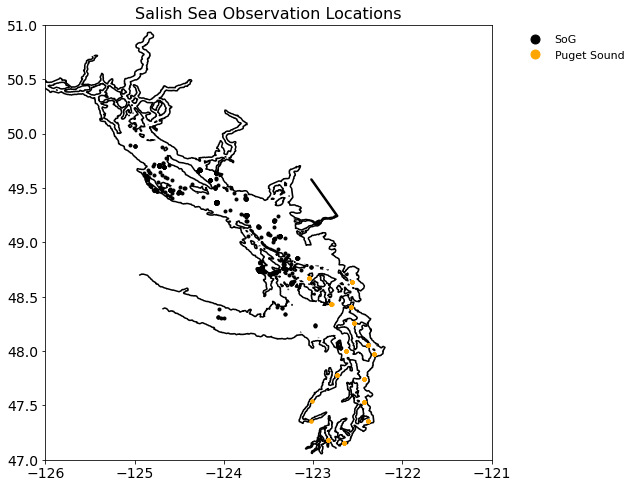

In [38]:
fig, ax = plt.subplots(1,1,figsize = (8,8))
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map',isobath=.1)
colors=('black','orange','firebrick','mediumspringgreen','fuchsia','royalblue','green','darkviolet',
        'lime','lightblue','darkgoldenrod','darkorange','deepskyblue','teal','darkgreen','darkblue','slateblue','purple')
datreg=dict()
for ind, iregion in enumerate(data.broadregions.unique()):
    datreg[iregion] = data.loc[data.broadregions==iregion]
    ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
            color = colors[ind], label=iregion)
ax.set_ylim(47, 51)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(bbox_to_anchor=[1,.6,0,0])
ax.set_xlim(-126, -121);
ax.set_title('Salish Sea Observation Locations');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False,markerscale=3.,fontsize=11)
#fig.savefig('SalishSeaObservationLocations.jpg',bbox_inches='tight')

In [39]:
def byRegion(ax,obsvar,modvar,lims):
    SS=[]
    for ind, iregion in enumerate(data.broadregions.unique()):
        #ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
                #color = colors[ind], label=iregion)
        SS0=et.varvarPlot(ax,datreg[iregion],obsvar,modvar,
                          cols=(colors[ind],),lname=iregion)
        SS.append(SS0)
    l=ax.legend(handles=[ip[0][0] for ip in SS])
    ax.set_xlabel('Observations')
    ax.set_ylabel('Model')
    ax.plot(lims,lims,'k-',alpha=.5)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_aspect(1)
    return SS,l

In [40]:
data['Month']=[ii.month for ii in data['dtUTC']]
JF=data.loc[(data.Month==1)|(data.Month==2)]
MAM=data.loc[(data.Month==3)|(data.Month==4)|(data.Month==5)]
JJA=data.loc[(data.Month==6)|(data.Month==7)|(data.Month==8)]
SOND=data.loc[(data.Month==9)|(data.Month==10)|(data.Month==11)|(data.Month==12)]

In [41]:
def bySeason(ax,obsvar,modvar,lims):
    for axi in ax:
        axi.plot(lims,lims,'k-')
        axi.set_xlim(lims)
        axi.set_ylim(lims)
        axi.set_aspect(1)
        axi.set_xlabel('Obs')
        axi.set_ylabel('Model')
    SS=et.varvarPlot(ax[0],JF,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[0].set_title('Winter')
    SS=et.varvarPlot(ax[1],MAM,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[1].set_title('Spring')
    SS=et.varvarPlot(ax[2],JJA,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[2].set_title('Summer')
    SS=et.varvarPlot(ax[3],SOND,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[3].set_title('Autumn')
    return 

In [42]:
data.region_name.unique()

array(['Northern Strait of Georgia', 'Central Strait of Georgia',
       'Gulf Islands', 'Nearshore-Central East', 'Nearshore-North East',
       'Nearshore North West', 'Tidal Mixed', 'Juan de Fuca',
       'South Sound', 'Admiralty Inlet', 'Central Basin', 'Whidbey Basin',
       'San Juan', 'Hood Canal', 'Baynes Sound',
       'Southern Strait of Georgia', 'Bellingham Bay', 'San Juan Islands'],
      dtype=object)

In [43]:
#data.loc[(data.region_name=='Northern Strait of Georgia')|(data.region_name=='Central Strait of Georgia')|(data.region_name=='Southern Strait of Georgia'),['broadregions']]='SoG'
MainSoG=data.loc[(data.region_name=='Northern Strait of Georgia')|(data.region_name=='Central Strait of Georgia')]
SouthernSoG=data.loc[(data.region_name=='Southern Strait of Georgia')]
Nearshore=data.loc[(data.region_name=='Nearshore-Central East')|(data.region_name=='Nearshore-North East')|(data.region_name=='Nearshore North West')]
Baynes=data.loc[(data.region_name=='Baynes Sound')]
Mixed=data.loc[(data.region_name=='Tidal Mixed')|(data.region_name=='Gulf Islands')|(data.region_name=='San Juan Islands')|(data.region_name=='San Juan')]
JdeF=data.loc[(data.region_name=='Juan de Fuca')]

NorthSound=data.loc[(data.region_name=='Whidbey Basin')|(data.region_name=='Bellingham Bay')|(data.region_name=='Admiralty Inlet')]
CentralSound=data.loc[(data.region_name=='Central Basin')]
SouthSound=data.loc[(data.region_name=='South Sound')|(data.region_name=='Hood Canal')]

#data.loc[(data.region_name=='Hood Canal'),['broadregions']]='Hood Canal'

In [44]:
monthlymeanMainSoG=MainSoG.groupby(['Month']).mean()
monthlymeanSouthernSoG=SouthernSoG.groupby(['Month']).mean()
monthlymeanNearshore=Nearshore.groupby(['Month']).mean()
monthlymeanBaynes=Baynes.groupby(['Month']).mean()
monthlymeanMixed=Mixed.groupby(['Month']).mean()
monthlymeanJdeF=JdeF.groupby(['Month']).mean()
monthlymeanSouthSound=SouthSound.groupby(['Month']).mean()
monthlymeanNorthSound=NorthSound.groupby(['Month']).mean()
monthlymeanCentralSound=CentralSound.groupby(['Month']).mean()

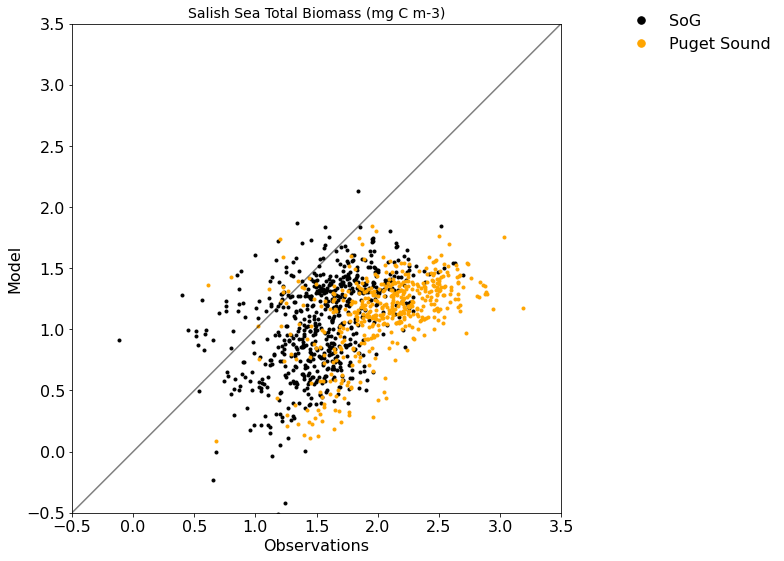

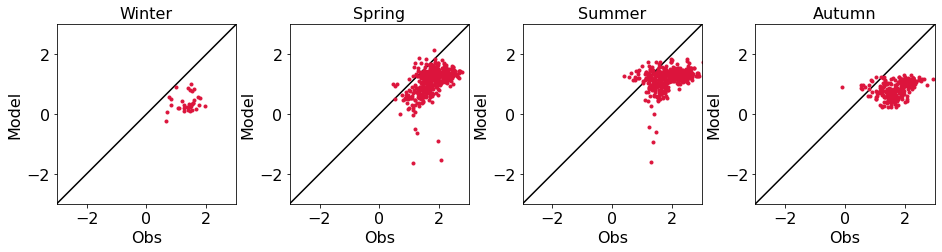

In [45]:
fig, ax = plt.subplots(1,1,figsize = (16,9))     
SS,l=byRegion(ax,'L10Total','L10mod_microzooplankton',(-0.5,3.5))
ax.set_title('Salish Sea Total Biomass (mg C m-3)',fontsize=14)
ax.legend(bbox_to_anchor=(1.1, 1.05),frameon=False,markerscale=2.5)
#fig.savefig('SalishSeaTotalBiomassModvsObs.jpg',bbox_inches='tight')
fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Total','L10mod_microzooplankton',(-3,3))

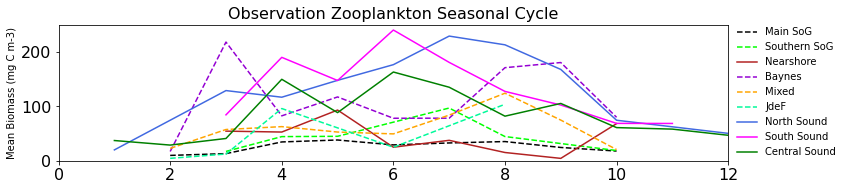

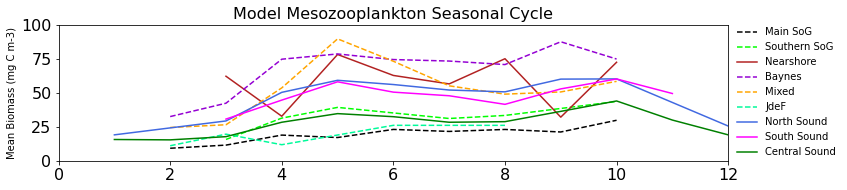

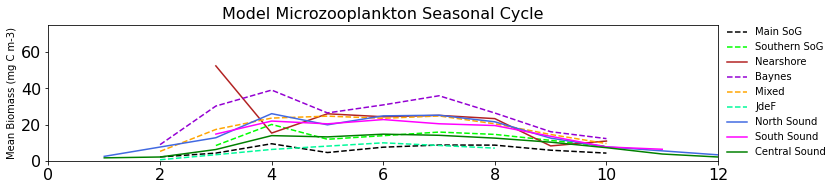

In [46]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanMainSoG['L10Total']),'--',color='k',label='Main SoG')
ax.plot(logt_inv(monthlymeanSouthernSoG['L10Total']),'--',color='lime',label='Southern SoG')
ax.plot(logt_inv(monthlymeanNearshore['L10Total']),'-',color='firebrick',label='Nearshore')
ax.plot(logt_inv(monthlymeanBaynes['L10Total']),'--',color='darkviolet',label='Baynes')
ax.plot(logt_inv(monthlymeanMixed['L10Total']),'--',color='orange',label='Mixed')
ax.plot(logt_inv(monthlymeanJdeF['L10Total']),'--',color='mediumspringgreen',label='JdeF')
ax.plot(logt_inv(monthlymeanNorthSound['L10Total']),'-',color='royalblue',label='North Sound')
ax.plot(logt_inv(monthlymeanSouthSound['L10Total']),'-',color='fuchsia',label='South Sound')
ax.plot(logt_inv(monthlymeanCentralSound['L10Total']),'-',color='green',label='Central Sound')
ax.set_ylim(0,250)
ax.set_xlim(0,12)
ax.set_title('Observation Zooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10,frameon=False,bbox_to_anchor=(1., 1.05))

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanMainSoG['L10mod_mesozooplankton']),'--',color='k',label='Main SoG')
ax.plot(logt_inv(monthlymeanSouthernSoG['L10mod_mesozooplankton']),'--',color='lime',label='Southern SoG')
ax.plot(logt_inv(monthlymeanNearshore['L10mod_mesozooplankton']),'-',color='firebrick',label='Nearshore')
ax.plot(logt_inv(monthlymeanBaynes['L10mod_mesozooplankton']),'--',color='darkviolet',label='Baynes')
ax.plot(logt_inv(monthlymeanMixed['L10mod_mesozooplankton']),'--',color='orange',label='Mixed')
ax.plot(logt_inv(monthlymeanJdeF['L10mod_mesozooplankton']),'--',color='mediumspringgreen',label='JdeF')
ax.plot(logt_inv(monthlymeanNorthSound['L10mod_mesozooplankton']),'-',color='royalblue',label='North Sound')
ax.plot(logt_inv(monthlymeanSouthSound['L10mod_mesozooplankton']),'-',color='fuchsia',label='South Sound')
ax.plot(logt_inv(monthlymeanCentralSound['L10mod_mesozooplankton']),'-',color='green',label='Central Sound')
ax.set_ylim(0,100)
ax.set_xlim(0,12)
ax.set_title('Model Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10,frameon=False,bbox_to_anchor=(1., 1.05))

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanMainSoG['L10mod_microzooplankton']),'--',color='k',label='Main SoG')
ax.plot(logt_inv(monthlymeanSouthernSoG['L10mod_microzooplankton']),'--',color='lime',label='Southern SoG')
ax.plot(logt_inv(monthlymeanNearshore['L10mod_microzooplankton']),'-',color='firebrick',label='Nearshore')
ax.plot(logt_inv(monthlymeanBaynes['L10mod_microzooplankton']),'--',color='darkviolet',label='Baynes')
ax.plot(logt_inv(monthlymeanMixed['L10mod_microzooplankton']),'--',color='orange',label='Mixed')
ax.plot(logt_inv(monthlymeanJdeF['L10mod_microzooplankton']),'--',color='mediumspringgreen',label='JdeF')
ax.plot(logt_inv(monthlymeanNorthSound['L10mod_microzooplankton']),'-',color='royalblue',label='North Sound')
ax.plot(logt_inv(monthlymeanSouthSound['L10mod_microzooplankton']),'-',color='fuchsia',label='South Sound')
ax.plot(logt_inv(monthlymeanCentralSound['L10mod_microzooplankton']),'-',color='green',label='Central Sound')
ax.set_ylim(0,75)
ax.set_xlim(0,12)
ax.set_title('Model Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10,frameon=False,bbox_to_anchor=(1., 1.05))


# 

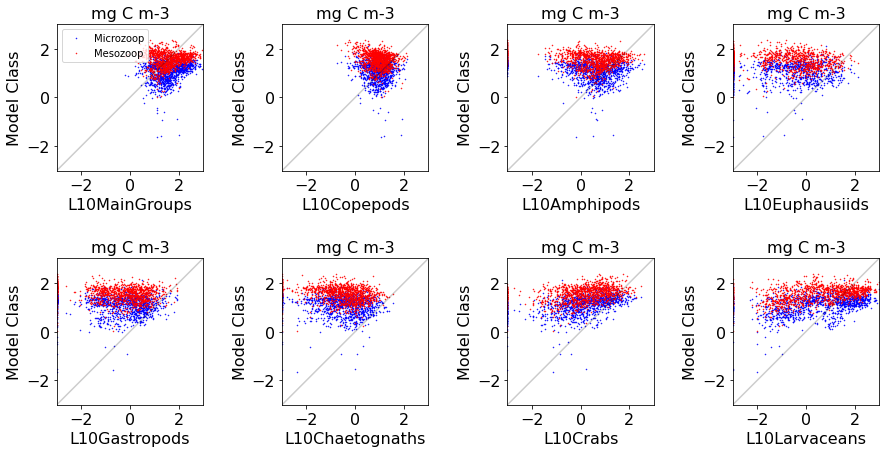

In [47]:
fig,ax=plt.subplots(2,4,figsize=(15,7))
fig.subplots_adjust(wspace=.4)
fig.subplots_adjust(hspace=.6)
ax=ax.flatten()

taxa=('L10MainGroups','L10Copepods', 'L10Amphipods', 'L10Euphausiids', 'L10Gastropods',
       'L10Chaetognaths', 'L10Crabs', 'L10Larvaceans')

mvar1=data['L10mod_microzooplankton']
mvar2=data['L10mod_mesozooplankton']

for ii in range(0,len(taxa)):
    ax[ii].plot((data.loc[:,[taxa[ii]]].values),(mvar1),'.',ms=1,color='blue',label='Microzoop')
    ax[ii].plot((data.loc[:,[taxa[ii]]].values),(mvar2),'.',ms=1,color='red',label='Mesozoop')
    ax[ii].set_ylabel('Model Class')
    ax[ii].set_xlabel(taxa[ii])
    ax[ii].set_title('mg C m-3')
    ax[ii].plot((-3,3),(-3,3),'k-',alpha=.2)
    ax[ii].set_xlim((-3,3))
    ax[ii].set_ylim((-3,3))
    ax[ii].set_aspect(1)
ax[0].legend(loc=2, fontsize = 'medium')

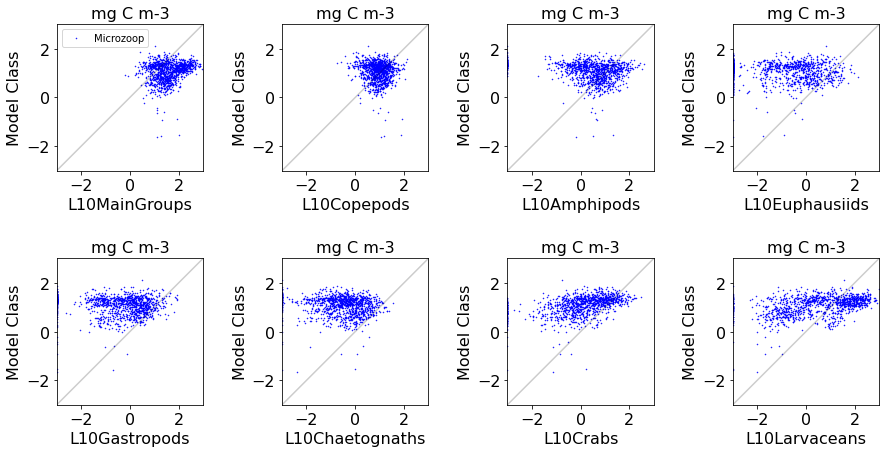

In [48]:
fig,ax=plt.subplots(2,4,figsize=(15,7))
fig.subplots_adjust(wspace=.4)
fig.subplots_adjust(hspace=.6)
ax=ax.flatten()

taxa=('L10MainGroups','L10Copepods', 'L10Amphipods', 'L10Euphausiids', 'L10Gastropods',
       'L10Chaetognaths', 'L10Crabs', 'L10Larvaceans')

mvar1=data['L10mod_microzooplankton']
mvar2=data['L10mod_mesozooplankton']

for ii in range(0,len(taxa)):
    ax[ii].plot((data.loc[:,[taxa[ii]]].values),(mvar1),'.',ms=1,color='blue',label='Microzoop')
    #ax[ii].plot((data.loc[:,[taxa[ii]]].values),(mvar2),'.',ms=1,color='red',label='Mesozoop')
    ax[ii].set_ylabel('Model Class')
    ax[ii].set_xlabel(taxa[ii])
    ax[ii].set_title('mg C m-3')
    ax[ii].plot((-3,3),(-3,3),'k-',alpha=.2)
    ax[ii].set_xlim((-3,3))
    ax[ii].set_ylim((-3,3))
    ax[ii].set_aspect(1)
ax[0].legend(loc=2, fontsize = 'medium')

Text(753.6684782608696, 0.5, '')

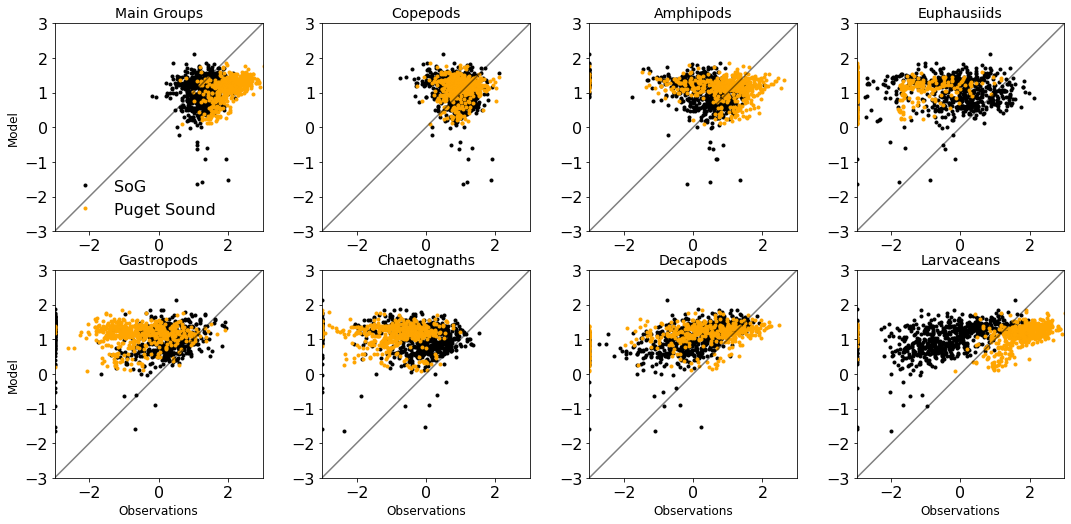

In [49]:
fig, ax = plt.subplots(2,4,figsize=(15,7))
fig.tight_layout() 

SS,l=byRegion(ax[0,0],'L10MainGroups','L10mod_microzooplankton',(-3,3))
ax[0,0].set_title('Main Groups',fontsize=14)
ax[0,0].legend(frameon=False)
ax[0,0].set_xlabel("")
ax[0,0].set_ylabel('Model',fontsize=12)

SS,l=byRegion(ax[0,1],'L10Copepods','L10mod_microzooplankton',(-3,3))
ax[0,1].set_title('Copepods',fontsize=14)
ax[0,1].legend((),frameon=False)
ax[0,1].set_xlabel("")
ax[0,1].set_ylabel("")

SS,l=byRegion(ax[0,2],'L10Amphipods','L10mod_microzooplankton',(-3,3))
ax[0,2].set_title('Amphipods',fontsize=14)
ax[0,2].legend((),frameon=False)
ax[0,2].set_xlabel("")
ax[0,2].set_ylabel("")

SS,l=byRegion(ax[0,3],'L10Euphausiids','L10mod_microzooplankton',(-3,3))
ax[0,3].set_title('Euphausiids',fontsize=14)
ax[0,3].legend((),frameon=False)
ax[0,3].set_xlabel("")
ax[0,3].set_ylabel("")

SS,l=byRegion(ax[1,0],'L10Gastropods','L10mod_microzooplankton',(-3,3))
ax[1,0].set_title('Gastropods',fontsize=14)
ax[1,0].legend((),frameon=False)
ax[1,0].set_xlabel('Observations',fontsize=12)
ax[1,0].set_ylabel('Model',fontsize=12)

SS,l=byRegion(ax[1,1],'L10Chaetognaths','L10mod_microzooplankton',(-3,3))
ax[1,1].set_title('Chaetognaths',fontsize=14)
ax[1,1].legend((),frameon=False)
ax[1,1].set_xlabel('Observations',fontsize=12)
ax[1,1].set_ylabel("")

SS,l=byRegion(ax[1,2],'L10Crabs','L10mod_microzooplankton',(-3,3))
ax[1,2].set_title('Decapods',fontsize=14)
ax[1,2].legend((),frameon=False)
ax[1,2].set_xlabel('Observations',fontsize=12)
ax[1,2].set_ylabel("")

SS,l=byRegion(ax[1,3],'L10Larvaceans','L10mod_microzooplankton',(-3,3))
ax[1,3].set_title('Larvaceans',fontsize=14)
ax[1,3].legend((),frameon=False)
ax[1,3].set_xlabel('Observations',fontsize=12)
ax[1,3].set_ylabel("")